c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


      index  y_prediction  y_actual
0      1764     -0.295041 -0.369379
1      1821     -0.178520 -0.353428
2      1835     -0.256382 -0.348233
3      1595     -0.226673 -0.346843
4      1731     -0.208753 -0.345574
...     ...           ...       ...
1209     42      5.391731  7.383273
1210    100      7.117485  7.882926
1211    595      3.849200  7.892109
1212    199      8.146660  9.494925
1213    332      6.879295  9.622104

[1214 rows x 3 columns]


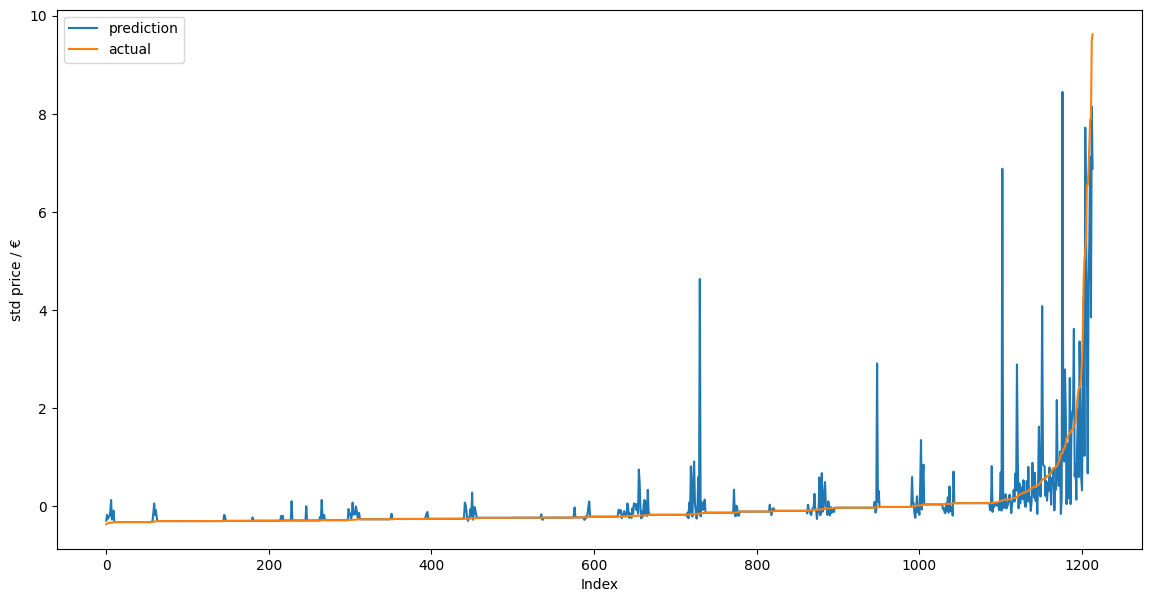

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("wines_SPA.csv")
data.columns = data.columns.str.lower().str.strip()
data = data.dropna()
# data.info()
data['year'] = data['year'].replace('N.V.', np.NaN)
data = data.dropna()
data['year'] = data['year'].astype(np.int64)
# data.info()
data = data.drop(columns='country', axis=1)
data.head()

# visualization
# data = data.drop(["winery","wine","region","type"], axis=1)
# data.head()
# sns.heatmap(data.corr(), annot=True, cmap="Blues")
# strong correlation between rating and price

# plt.bar(data['type'], data['price'])
# plt.xticks(rotation=90)
# plt.xlabel('Wine type')
# plt.ylabel('Price / euro(€)')
# plt.title('Wine price and type bar chart')
# plt.show()

# fig, ax = plt.subplots(ncols=1, figsize=(18, 8))
# sns.boxplot(data = data, x='type', y='price', ax=ax)
# plt.xticks(rotation=90)
# plt.xlabel('wine type')
# plt.ylabel('price / euro(€)')
# plt.title('Wine price and type box chart')
# plt.show()

for col in data.columns:
    if data[col].dtype == 'object':
        label = LabelEncoder()
        label = label.fit(data[col])
        data[col] = label.transform(data[col].astype(str))
# data.info()

# standarization
data = (data - data.mean())/data.std()
# let X is all columns except price, and y is price
X = data.drop(columns=['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# build the models dictionary and put the r2 factor in it later
models = {}
def train_to_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    r2 = r2_score(y_test, y_predict)
    models[index] = r2

total_model = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor, RandomForestRegressor]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'BayesianRidge', 'DecisionTreeRegressor', 'LinearSVR', 'KNeighborsRegressor', 'RandomForestRegressor']
index = 0
for regressor in total_model:
    train_to_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1
models

KNeighborsRegressor_model = KNeighborsRegressor()
KNeighborsRegressor_model.fit(X_train, y_train)
y_prediction = KNeighborsRegressor_model.predict(X_test)
predictions = pd.DataFrame(
    {'y_prediction': y_prediction,
     'y_actual': y_test}
)
predictions = predictions.sort_values(by='y_actual')
predictions = predictions.reset_index()
print(predictions)
plt.figure(figsize=(14,7))
plt.plot(predictions['y_prediction'], label='prediction')
plt.plot(predictions['y_actual'], label='actual')
plt.xlabel('Index')
plt.ylabel('std price deviation')
plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 6070 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6070 non-null   object 
 1   wine         6070 non-null   object 
 2   year         6070 non-null   int64  
 3   rating       6070 non-null   float64
 4   num_reviews  6070 non-null   int64  
 5   country      6070 non-null   object 
 6   region       6070 non-null   object 
 7   price        6070 non-null   float64
 8   type         6070 non-null   object 
 9   body         6070 non-null   float64
 10  acidity      6070 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 569.1+ KB


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


      index  y_prediction   y_actual
0      1764     -0.251923  -0.369379
1      1947     -0.257671  -0.364968
2      1029     -0.267733  -0.359531
3      1805     -0.183921  -0.355422
4      1821     -0.184619  -0.353428
...     ...           ...        ...
1209    595      0.269403   7.892109
1210     94     13.041085   7.957844
1211     97      4.603715   8.655424
1212    188      6.941651  10.383123
1213    343      7.828997  16.207611

[1214 rows x 3 columns]


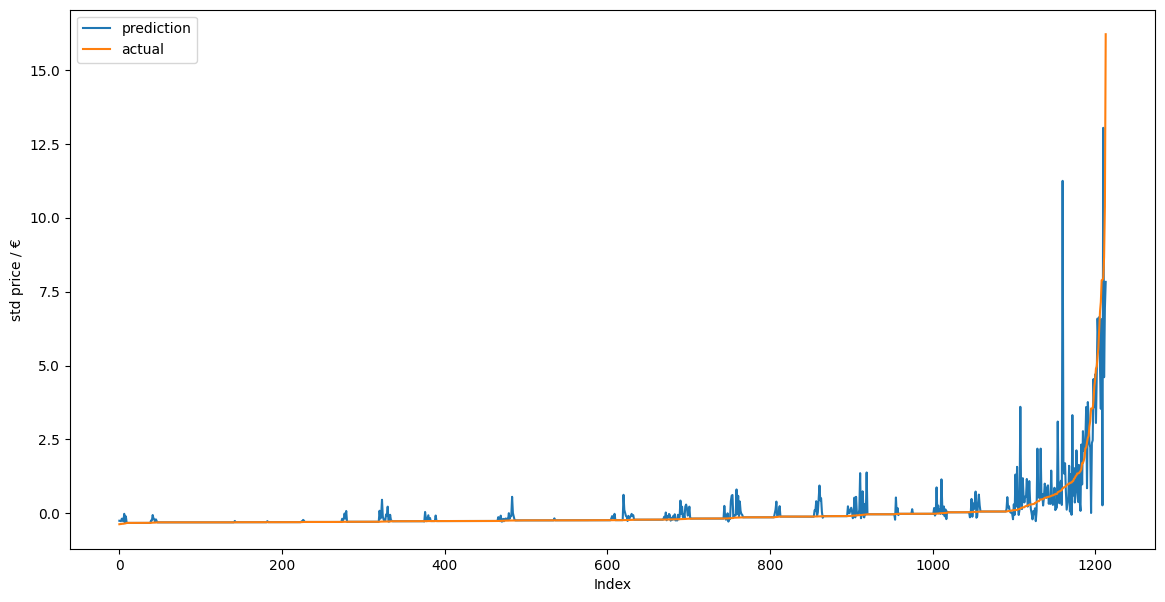

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("wines_SPA.csv")
data.columns = data.columns.str.lower().str.strip()
# data.info()
data = data.dropna()
# data.info()
data['year'] = data['year'].replace('N.V.', np.NaN)
data = data.dropna()
data['year'] = data['year'].astype(np.int64)
data.info()
data = data.drop(columns='country', axis=1)
# data.head()

# visualization
# data = data.drop(["winery","wine","region","type"], axis=1)
# data.head()
# sns.heatmap(data.corr(), annot=True, cmap="Blues")
# strong correlation between rating and price

# plt.bar(data['type'], data['price'])
# plt.xticks(rotation=90)
# plt.xlabel('Wine type')
# plt.ylabel('Price / euro(€)')
# plt.title('Wine price and type bar chart')
# plt.show()

for col in data.columns:
    if data[col].dtype == 'object':
        label = LabelEncoder()
        label = label.fit(data[col])
        data[col] = label.transform(data[col].astype(str))

# standarization
data = (data - data.mean())/data.std()
# let X is all columns except price, and y is price
X = data.drop(columns=['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# build the models dictionary and put the r2 factor in it later
models = {}
def train_to_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    r2 = r2_score(y_test, y_predict)
    models[index] = r2

total_model = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor, RandomForestRegressor]
model_names = ['LinearRegression', 'Lasso', 'Ridge', 'BayesianRidge', 'DecisionTreeRegressor', 'LinearSVR', 'KNeighborsRegressor', 'RandomForestRegressor']
index = 0
for regressor in total_model:
    train_to_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1
models

RandomForestRegressor_model = RandomForestRegressor()
RandomForestRegressor_model.fit(X_train, y_train)
y_prediction = RandomForestRegressor_model.predict(X_test)
predictions = pd.DataFrame(
    {'y_prediction': y_prediction,
     'y_actual': y_test}
)
predictions = predictions.sort_values(by='y_actual')
predictions = predictions.reset_index()
print(predictions)
plt.figure(figsize=(14,7))
plt.plot(predictions['y_prediction'], label='prediction')
plt.plot(predictions['y_actual'], label='actual')
plt.xlabel('Index')
plt.ylabel('std price deviation')
plt.legend()
plt.show()